# 5.5 数据可视化

## 0 前期准备

#### 数据准备

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import os

In [2]:
path = '../data'    #定义路径
merge_data = pd.read_excel(os.path.join(path, 'merge_shop_coupon_nm.xlsx'), encoding='utf8', index=False)    #读取数据
merge_data.head()    #查看数据

,店名,关键词,城市,评分,评价数,人均,地址,营业时间,菜名,商家等级,购买人数,团购价
0,老北京涮羊肉,火锅,xa,4.4,877,45.5,西安市雁塔区朱雀大街250号东方大酒店西门斜对面（子午路站下车向北走60米路西）,11:00-21:00,【羊肉】【豆腐】【麻酱】【精品肥牛】【粉丝】【羔羊肉】【牛肚】【油豆皮】【香菇】【豆皮】【土...,2,1692,118.5
1,大龙燚火锅(粉巷店),火锅,xa,4.6,2253,100.0,西安市碑林区粉巷南院门15A南苑中央广场食尚南苑2F,周一至周日 10:00-21:00,【麻辣排骨】【千层毛肚】【鸳鸯锅】【鸭血】【天味香肠】【薄土豆】【功夫黄瓜】【清汤锅】【印度...,2,19584,88.0
2,鲜上鲜文鱼庄(凤城五路店),火锅,xa,4.5,1398,56.0,西安市未央区凤城五路地铁D口出人人乐5楼,全天,【生菜】【鸳鸯锅】【千叶豆腐】【荷包豆腐】【生鱼片】【毛肚】【文鱼】【鱼丸】【撒尿牛丸】【山...,2,11798,52.0
3,蜜悦士鲜牛肉时尚火锅(凯德广场店),火锅,xa,4.4,48,63.0,西安市雁塔区南二环凯德广场四楼东南角,10:00-21:00,【吊龙伴】【三花腱】【番茄锅】【招牌牛舌】【油豆皮】【油炸豆腐皮】【菌汤鸳鸯锅】【手工面】【...,2,40,59.9
4,大自在火锅(和平村店),火锅,xa,4.3,214,84.0,西安市莲湖区三桥和平村十字西南角伯乐城市广场6层,暂无时间,【蔬菜拼盘】【黄豆芽】【虾饺】【撒尿牛肉丸】【油条】【毛肚】【自在小酥肉】【鸡爪】【自在嫩牛...,2,1282,59.5


In [3]:
model_cols = ['城市', '评分', '评价数', '人均', '商家等级', '购买人数', '团购价']    #定义模型数据列
model_data = merge_data.loc[:, model_cols]    #筛选数据

#### 模型准备

In [4]:
import patsy    #导入patsy库
import statsmodels.api as sm    #基于数组接入线性模型
import statsmodels.formula.api as smf    #基于公式接入线性模型

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
results_f = smf.ols('np.log(购买人数 + 1) ~ 城市 + 评分 + 评价数 + 人均 + C(商家等级) + 团购价 ', data = model_data).fit()    #用公式API和patsy公式拟合最小二乘回归模型

## 1 箱线图

#### 绘制小提琴图

/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


<Figure size 432x288 with 0 Axes>

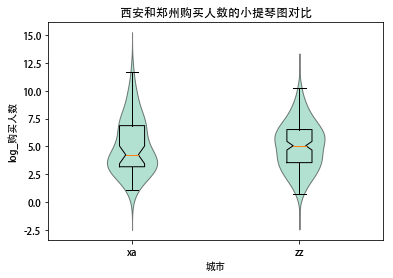

In [6]:
import statsmodels.graphics.api as smg

city = ['xa', 'zz']    #创建城市列表
buyer = [np.log(model_data['购买人数'][model_data.城市 == c] + 1) for c in city]     #生成两座城市购买人数列表
labels = ['xa', 'zz']    #设定标签
fig = plt.figure()    #创建画布
smg.violinplot(buyer, labels = labels)  #绘制小提琴对比图
plt.xlabel("城市")    #设置x轴标签
plt.ylabel("log_购买人数")    #设置y轴标签
plt.title('西安和郑州购买人数的小提琴图对比')    #设置标题
plt.show()    #输出图像

## 2 相关图

#### 绘制相关图

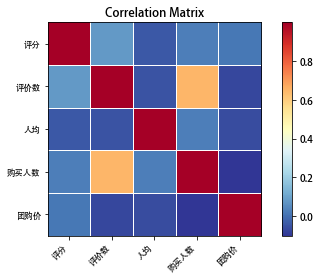

In [7]:
num_cols = ['评分', '评价数', '人均', '购买人数', '团购价']    #定义数值变量所在列
corr_matrix = np.corrcoef(model_data.loc[:, num_cols].T)    #计算数值变量之间的相关系数
smg.plot_corr(corr_matrix, xnames = num_cols)    #绘制数值变量之间的相关图
plt.show()    #输出图像

## 3 拟合图

#### 绘制模型拟合QQ图

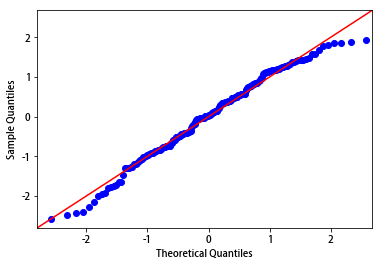

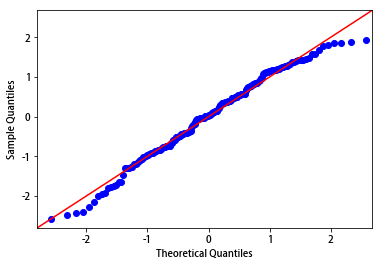

In [8]:
import scipy.stats as stats
res = results_f.resid    #获取最小二乘回归拟合模型的残差数据
sm.qqplot(res, stats.t, fit = True, line = '45')    #绘制模型残差的qq图，自动确定t分布的参数，包括均值和标准差

## 4 回归图

#### 绘制回归图

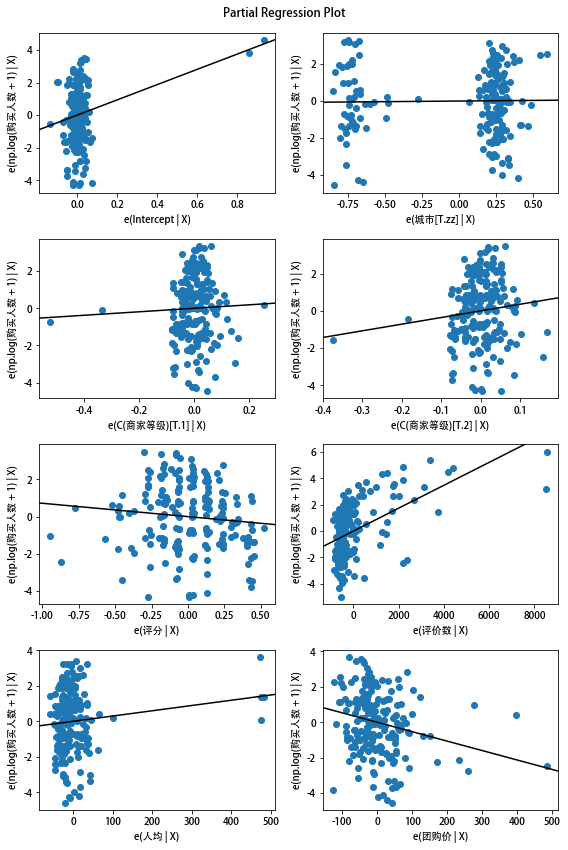

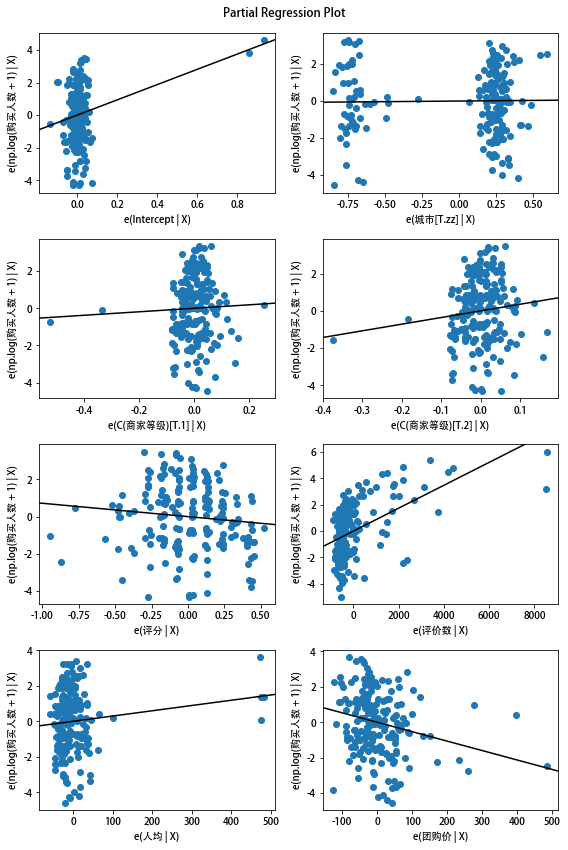

In [9]:
fig = plt.figure(figsize=(8, 12))    #设定画布大小
smg.plot_partregress_grid(results_f, fig = fig)    #绘制模型中每个自变量与对数购买人数的回归图